In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [203]:
df = pd.read_csv('data/diabetes.csv')
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Replacing zeros with null

In [204]:
df['Glucose'].replace(0, np.nan, inplace=True)
df['BloodPressure'].replace(0, np.nan, inplace=True)
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['Insulin'].replace(0, np.nan, inplace=True)
df['BMI'].replace(0, np.nan, inplace=True)
df['DiabetesPedigreeFunction'].replace(0, np.nan, inplace=True)
df['Age'].replace(0, np.nan, inplace=True)

In [205]:
df.duplicated().any()

False

In [206]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [207]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [208]:
data = df.values
X = data[:, :-1]
y = data[:, -1]
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0


In [209]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [211]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


labels = Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Mean - Glucose, BloodPressure, SkinThickness, BMI (columns:1,2,3,5)

Median - Insulin, DiabetesPedigreeFunction, Age (columns:4,6,7)

In [212]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [213]:
X_train[:, (1,2,3,5)] = mean_imputer.fit_transform(X_train[:, (1,2,3,5)])
X_train[:, (4,6,7)] = median_imputer.fit_transform(X_train[:, (4,6,7)])
X_test[:, (1,2,3,5)] = mean_imputer.transform(X_test[:, (1,2,3,5)])
X_test[:, (4,6,7)] = median_imputer.transform(X_test[:, (4,6,7)])

In [214]:
pd.DataFrame(X_train).isna().any()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [215]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,9.0,145.0,80.0,46.000000,130.0,37.9,0.637,40.0
1,10.0,129.0,62.0,36.000000,125.0,41.2,0.441,38.0
2,7.0,102.0,74.0,40.000000,105.0,37.2,0.204,45.0
3,8.0,120.0,78.0,28.770686,125.0,25.0,0.409,64.0
4,2.0,120.0,76.0,37.000000,105.0,39.7,0.215,29.0
...,...,...,...,...,...,...,...,...
609,2.0,157.0,74.0,35.000000,440.0,39.4,0.134,30.0
610,7.0,187.0,50.0,33.000000,392.0,33.9,0.826,34.0
611,13.0,126.0,90.0,28.770686,125.0,43.4,0.583,42.0
612,4.0,171.0,72.0,28.770686,125.0,43.6,0.479,26.0


Applying min-max scaling on all columns

In [216]:
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [217]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,0.600000,0.655844,0.571429,0.423913,0.138387,0.402863,0.246325,0.372549
1,0.666667,0.551948,0.387755,0.315217,0.132371,0.470348,0.159020,0.333333
2,0.466667,0.376623,0.510204,0.358696,0.108303,0.388548,0.053452,0.470588
3,0.533333,0.493506,0.551020,0.236638,0.132371,0.139059,0.144766,0.843137
4,0.133333,0.493506,0.530612,0.326087,0.108303,0.439673,0.058352,0.156863
...,...,...,...,...,...,...,...,...
609,0.133333,0.733766,0.510204,0.304348,0.511432,0.433538,0.022272,0.176471
610,0.466667,0.928571,0.265306,0.282609,0.453670,0.321063,0.330512,0.254902
611,0.866667,0.532468,0.673469,0.236638,0.132371,0.515337,0.222272,0.411765
612,0.266667,0.824675,0.489796,0.236638,0.132371,0.519427,0.175947,0.098039


In [218]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Naive Bayes Classification

In [219]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [220]:
y_pred_gnb = gnb.predict(X_test)

In [221]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)

In [222]:
cr_gnb = classification_report(y_test, y_pred_gnb, output_dict=True, zero_division='warn')
pd.DataFrame(cr_gnb)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.798077,0.680000,0.75974,0.739038,0.755907
recall,0.838384,0.618182,0.75974,0.728283,0.759740
f1-score,0.817734,0.647619,0.75974,0.732677,0.756979
support,99.000000,55.000000,0.75974,154.000000,154.000000


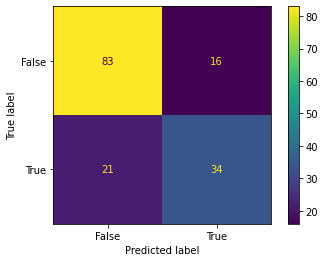

In [223]:
cm_display_gnb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_gnb), display_labels=[False, True])
cm_display_gnb.plot()
plt.show()

## KNN Classification

##### Selecting best value for n_neighbors using GridsearchCV

In [224]:
knn_test = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_test, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [225]:
knn_gscv.best_params_

{'n_neighbors': 27}

Hence, 27 gives best result for n_neighbors

In [226]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [227]:
y_pred_knn = knn.predict(X_test)

In [228]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

In [229]:
cr_knn = classification_report(y_test, y_pred_knn, output_dict=True, zero_division='warn')
pd.DataFrame(cr_knn)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.828829,0.837209,0.831169,0.833019,0.831822
recall,0.929293,0.654545,0.831169,0.791919,0.831169
f1-score,0.876190,0.734694,0.831169,0.805442,0.825656
support,99.000000,55.000000,0.831169,154.000000,154.000000


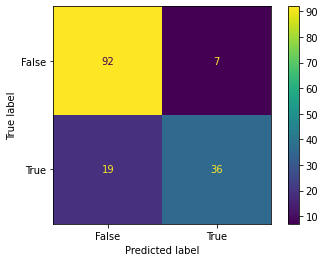

In [230]:
cm_display_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn), display_labels=[False, True])
cm_display_knn.plot()
plt.show()

## SVM Classification

In [231]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [232]:
y_pred_svm = svm.predict(X_test)

In [233]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

In [234]:
cr_svm = classification_report(y_test, y_pred_svm, output_dict=True, zero_division='warn')
pd.DataFrame(cr_svm)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.810345,0.868421,0.824675,0.839383,0.831086
recall,0.949495,0.600000,0.824675,0.774747,0.824675
f1-score,0.874419,0.709677,0.824675,0.792048,0.815582
support,99.000000,55.000000,0.824675,154.000000,154.000000


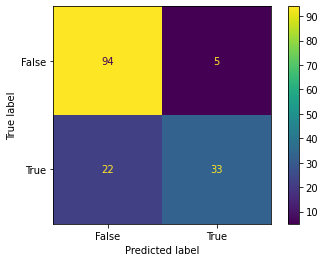

In [235]:
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svm), display_labels=[False, True])
cm_display_svm.plot()
plt.show()

## Comparing Classification Scores

In [236]:
comparison_data = (('Naive Bayes', accuracy_gnb, precision_gnb, recall_gnb, f1_gnb),
                ('K Nearest Neighbor', accuracy_knn, precision_knn, recall_knn, f1_knn),
                ('Support Vector', accuracy_svm, precision_svm, recall_svm, f1_svm))

In [237]:
pd.DataFrame(comparison_data, columns = ('Comparison algorithm','Accuracy','Precision','Recall','F-measure'))

,Comparison algorithm,Accuracy,Precision,Recall,F-measure
0,Naive Bayes,0.759740,0.680000,0.618182,0.647619
1,K Nearest Neighbor,0.831169,0.837209,0.654545,0.734694
2,Support Vector,0.824675,0.868421,0.600000,0.709677
